In [15]:
# Code from Book: Build Your Own AI Investor
# Damon Lee 2020
# Check out the performance on www.valueinvestingai.com
# Code uses data from the (presumably) nice people at https://simfin.com/. 
# Feel free to fork this code for others to see what can be done with it.

import pandas as pd
import numpy as np
import math
import pickle # get the ML model from other notebook
from matplotlib import pyplot as plt # scatter plot
import matplotlib.lines as mlines # plot

In [16]:
from platform import python_version
print(python_version())

3.9.7


In [17]:
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
yperf=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)
yperf=yperf["Perf"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, yperf, test_size=0.1, random_state=5)

# Save CSVs in case want to see the data.
X_train.to_csv("Annual_Stock_Price_Fundamentals_Ratios_train.csv")
X_test.to_csv("Annual_Stock_Price_Fundamentals_Ratios_test.csv")
y_train.to_csv("Annual_Stock_Price_Performance_Percentage_train.csv")
y_test.to_csv("Annual_Stock_Price_Performance_Percentage_test.csv")

# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

pl_linear = Pipeline([('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())])
pl_linear.fit(X_train, y_train)
y_pred = pl_linear.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_linear.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
import pickle # To save the fitted model
pickle.dump(pl_linear, open("pl_linear.p", "wb" ))

train mse:  1.6365676779325797
test mse:  1.261996242597575


In [5]:
yperf

0        0.764005
1        0.373311
2       -0.152369
3        0.185295
4        0.416215
           ...   
18515   -0.247917
18516    0.268698
18517   -0.008791
18518    1.337917
18519    0.293333
Name: Perf, Length: 18520, dtype: float64

In [7]:
type(yperf)

pandas.core.series.Series

In [8]:
yperf

0        0.764005
1        0.373311
2       -0.152369
3        0.185295
4        0.416215
           ...   
18515   -0.247917
18516    0.268698
18517   -0.008791
18518    1.337917
18519    0.293333
Name: Perf, Length: 18520, dtype: float64

In [18]:
# X AND Y (no splitting for train/test)
# Financial ratios 
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
# annual stock performances
y=pd.read_csv("Annual_Stock_Price_Performance_Filtered.csv", index_col=0)
# convert to date
y["Date"], y["Date2"]=pd.to_datetime(y["Date"]), pd.to_datetime(y["Date2"])

# X AND Y (splitting for train/test)
X_train=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios_train.csv", index_col=0)
X_test=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios_test.csv", index_col=0)
y_train=pd.read_csv("Annual_Stock_Price_Performance_Percentage_train.csv", index_col=0)
y_test=pd.read_csv("Annual_Stock_Price_Performance_Percentage_test.csv", index_col=0)

y_=pd.DataFrame()
y_=y.loc[y_test.index.values, :]

# convert string to datetime
y_["Date"], y_["Date2"]=pd.to_datetime(y_["Date"]), pd.to_datetime(y_["Date2"])

In [12]:
y

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
0,A,16.78,2008-12-19,2.483239e+08,A,29.60,2009-12-21,9.319856e+07
1,A,29.60,2009-12-21,9.319856e+07,A,40.65,2010-12-21,1.469619e+08
2,A,40.10,2010-12-20,1.613504e+08,A,33.99,2011-12-20,1.247977e+08
3,A,33.73,2011-12-16,1.053320e+08,A,39.98,2012-12-17,1.381149e+08
4,A,40.58,2012-12-20,1.545570e+08,A,57.47,2013-12-20,1.697664e+08
...,...,...,...,...,...,...,...,...
18515,ZYNE,4.80,2019-03-11,2.979552e+06,ZYNE,3.61,2020-03-10,2.898415e+06
18516,ZYNE,3.61,2020-03-10,2.898415e+06,ZYNE,4.58,2021-03-10,7.940090e+06
18517,ZYXI,4.55,2018-02-28,5.852392e+05,ZYXI,4.51,2019-02-28,2.961627e+05
18518,ZYXI,5.09,2019-02-26,2.683601e+05,ZYXI,11.90,2020-02-26,3.442361e+06


In [6]:
y_

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
9836,LNT,38.33,2018-02-23,7.473035e+07,LNT,45.75,2019-02-25,6.141256e+07
5390,EBF,15.88,2015-05-08,3.283809e+06,EBF,18.99,2016-05-09,2.965383e+06
13349,PSX,77.52,2015-02-20,3.539637e+08,PSX,81.05,2016-02-22,2.656705e+08
7921,HROW,2.44,2017-03-21,1.542714e+05,HROW,1.78,2018-03-21,7.962652e+04
7193,GME,22.52,2011-03-30,7.990321e+07,GME,23.21,2012-03-29,2.067408e+08
...,...,...,...,...,...,...,...,...
7061,GFF,12.14,2018-11-19,5.032637e+06,GFF,22.56,2019-11-19,4.448877e+06
9485,LAMR,57.64,2015-02-26,8.040475e+07,LAMR,56.05,2016-02-26,2.908272e+07
7699,HLF,30.40,2017-02-23,1.664804e+08,HLF,41.92,2018-02-23,1.681729e+08
7312,GRA,72.01,2017-02-23,5.103601e+07,GRA,66.93,2018-02-23,2.901596e+07


In [7]:
# Calculate Altman Z'' scores 1995
def calcZScores(x):
    Z = pd.DataFrame()
    Z['Z score'] = 3.25 \
    + 6.51 * x['(CA-CL)/TA']\
    + 3.26 * x['RE/TA']\
    + 6.72 * x['EBIT/TA']\
    + 1.05 * x['Book Equity/TL']
    return Z

In [8]:
z = calcZScores(x)
z.head()

,Z score
0,7.664439
1,7.435224
2,7.538172
3,9.311402
4,8.385200


In [9]:
# Daily stock price time series for ALL stocks. 5M rows. Some days missing.
def getYRawData():
    daily_stock_prices=pd.read_csv('C:/Users/Usuario/MachineLearning/Stock_Data/SimFin/us-shareprices-daily/us-shareprices-daily.csv',\
                                   delimiter=';')
    daily_stock_prices["Date"]=pd.to_datetime(daily_stock_prices["Date"])
    print('Reading historical time series stock data, matrix size is: ', daily_stock_prices.shape)
    return daily_stock_prices

In [10]:
def getYPerf(y_):
    y=pd.DataFrame()
    y["Ticker"] = y_["Ticker"]
    y["Perf"]=(y_["Open Price2"]-y_["Open Price"])/y_["Open Price"]
    y[y["Perf"].isnull()]=0
    return y

In [11]:
def getStockPriceBetweenDates(date1, date2, ticker, d, rows):
#     # Alternative way
#     rows = d[(d["Date"].between(pd.to_datetime(date1),\
#                                 pd.to_datetime(date2) )) \
#                                  & (d["Ticker"]==ticker)]
    rows = d.loc[(d["Date"].values>date1) &\
                 (d["Date"].values<date2) &\
                 (d["Ticker"]==ticker)]
    return rows

In [12]:
def getStockPriceData(ticker, y_, mask, daily_stock_prices, rows):
    date1 = y_[mask][y_[mask]["Ticker"] == ticker]["Date"].values[0]
    date2 = y_[mask][y_[mask]["Ticker"] == ticker]["Date2"].values[0]
    rows = getStockPriceBetweenDates(date1, date2,\
                                     ticker, daily_stock_prices, rows)
    return rows

In [13]:
def getDataForDateRange(date_Index_New, rows):
    WeeklyStockDataRows = pd.DataFrame()
    for I in date_Index_New:
        WeeklyStockDataRows = WeeklyStockDataRows.append(\
          rows.iloc[rows.index.get_loc(I, method="nearest")])
    return WeeklyStockDataRows

In [14]:
def getStockTimeSeries(dateTimeIndex, y_, tickers, mask, daily_stock_prices):
    stockRet = pd.DataFrame(index=dateTimeIndex)
    dTI_new = dateTimeIndex.strftime('%Y-%m-%d') # Change Date Format
    rows=pd.DataFrame()
    for tick in tickers:
        # Here "rows" is stock price time series data for individual stock
        rows = getStockPriceData(tick, y_, mask, daily_stock_prices, rows)
        rows.index = pd.DatetimeIndex(rows["Date"])
        WeeklyStockDataRows = getDataForDateRange(dTI_new, rows)
        # Here can use Open, Close, Adj. Close, etc. price
        stockRet[tick]=WeeklyStockDataRows["Close"].values
    return stockRet

In [15]:
def getPortfolioRelativeTimeSeries(stockRet):
    for key in stockRet.keys():
        stockRet[key]=stockRet[key]/stockRet[key][0]
    stockRet["Portfolio"] = stockRet.sum(axis=1)/(stockRet.keys().shape[0])
    return stockRet

In [16]:
# Function returns to us dataframes of selected stocks/portfolio performance for 1 year.
# y_ is annual stock performances (all backtest years)
# date_starting e.g. '2010-01-01'
# daily_stock_prices is daily(mostly) stock price time series for ALL stocks
def getPortTimeSeriesForYear(date_starting, y_, x, daily_stock_prices, ml_model_pipeline):
    # get y dataframe as ticker and ticker performance only
    y = getYPerf(y_)
    # Get performance only for time frame we care about,
    # mask original data using the start date
    mask = y_["Date"].between(\
              pd.to_datetime(date_starting) - pd.Timedelta(days=60),\
              pd.to_datetime(date_starting) + pd.Timedelta(days=60) )
    # Get return prediction from model
    y_pred = ml_model_pipeline.predict(x[mask])
    # Make it a DataFrame to select the top picks
    y_pred = pd.DataFrame(y_pred)
    
    
    ##### Change in code for Z score filtering ##### 
    # Separate out stocks with low Z scores
    z = calcZScores(x)
    # 3.75 is approx. B- rating
    zbl = (z['Z score'][mask].reset_index(drop=True) > 3) 
    y_pred_z = y_pred[zbl]
    # Get bool list of top stocks
    bl = (y_pred_z[0] > y_pred_z.nlargest(8,0).tail(1)[0].values[0]) 
    dateTimeIndex = pd.date_range(\
                          start=date_starting, periods=52, freq='W')
    # See Z scores
    #print(z['Z score'][mask].reset_index(drop=True)[bl & zbl]) 
    # 7 greatest performance stocks of y_pred 
    ticker_list = \
    y[mask].reset_index(drop=True)[bl & zbl]["Ticker"].values
    ##### Change in code for Z score filtering ##### 
    
    
#     ##### Tutorial code without Z score filtering ##### 
      # bool list of top stocks
#     bl = (y_pred[0] > y_pred.nlargest(8,0).tail(1)[0].values[0]) 
      # DatetimeIndex
#     dateTimeIndex = pd.date_range(start=date_starting, periods=52, freq='W')
#     # 7 greatest performance stocks of y_pred 
#     ticker_list = y[mask].reset_index(drop=True)[bl]["Ticker"].values
#     ##### Tutorial code without Z score filtering ##### 
    
    
    # Issue with one of the tickers equaling 0, fix with lambda function
    #ticker_list = list(filter(lambda dateTimeIndex: dateTimeIndex != 0, ticker_list))
    
    # After we know our stock picks, we get the stock performance
    # Get DataFrame index of time stamp, series of stock prices, keys=tickers
    stockRet = getStockTimeSeries(dateTimeIndex, y_,\
                                  ticker_list, mask, daily_stock_prices)
    # Get DataFrame of relative stock prices from 1st day(or close) 
    # and whole portfolio
    stockRetRel = getPortfolioRelativeTimeSeries(stockRet)
    return [stockRetRel, stockRetRel["Portfolio"], ticker_list]

In [17]:
def getPortTimeSeries(y_, x, daily_stock_prices, ml_model_pipeline, verbose=True):
    dr=pd.date_range(start='2009-01-01', periods=11, freq='Y') # Date range
    port_perf_all_years = pd.DataFrame()
    ref=1 # relative performance reference.
    for curr_date in dr:
        [comp, this_year_perf, ticker_list] = \
        getPortTimeSeriesForYear(curr_date, y_, x,\
                                 daily_stock_prices, ml_model_pipeline)
        if verbose:
            print("Backtest performance for year starting ",\
                  curr_date, " is:",\
                  round((this_year_perf.iloc[-1]-1)*100,2), "%")
            print("With stocks:", ticker_list)
            for tick in ticker_list:
                print(tick, "Performance was:",\
                      round((comp[tick].iloc[-1]-1)*100,2), "%" )
            print("---------------------------------------------")
        
        this_year_perf = this_year_perf * ref
        port_perf_all_years = pd.concat([port_perf_all_years,\
                                         this_year_perf])
        ref = this_year_perf.iloc[-1]
    port_perf_all_years.columns = ["Indexed Performance"]
    return port_perf_all_years

In [18]:
daily_stock_prices=getYRawData()

Reading historical time series stock data, matrix size is:  (8125701, 11)


In [19]:
#pl_linear.p, pl_ElasticNet.p, pl_KNeighbors.p, pl_rfregressor.p, pl_decTree.p, pl_svm.p
regressor_pipeline = pickle.load(open("pl_linear.p", "rb" ))
#regressor_pipeline = pickle.load(open("rfregressor.p", "rb" ))
test = getPortTimeSeries(y_, X_test, daily_stock_prices, regressor_pipeline, verbose=True)
print('Performance is: ', 100 * (test["Indexed Performance"][-1]-1), '%')

Backtest performance for year starting  2009-12-31 00:00:00  is: 10.96 %
With stocks: ['AMKR' 'BMS' 'TEL' 'IPG' 'MGLN' 'PRDO' 'AMD']
AMKR Performance was: 24.59 %
BMS Performance was: 12.42 %
TEL Performance was: 23.77 %
IPG Performance was: 29.42 %
MGLN Performance was: 11.74 %
PRDO Performance was: -27.1 %
AMD Performance was: 1.9 %
---------------------------------------------
Backtest performance for year starting  2010-12-31 00:00:00  is: -20.72 %
With stocks: ['TWI' 'AMD' 'SNEX' 'PLAB' 'TST' 'LYV' 'NCMI']
TWI Performance was: -9.19 %
AMD Performance was: -39.21 %
SNEX Performance was: 2.84 %
PLAB Performance was: -2.32 %
TST Performance was: -44.7 %
LYV Performance was: -19.16 %
NCMI Performance was: -33.3 %
---------------------------------------------
Backtest performance for year starting  2011-12-31 00:00:00  is: 8.51 %
With stocks: ['STRR' 'GRA' 'MPC' 'SAVE' 'NUVA' 'LEA' 'CCXI']
STRR Performance was: -3.94 %
GRA Performance was: 20.6 %
MPC Performance was: 45.97 %
SAVE Perfo

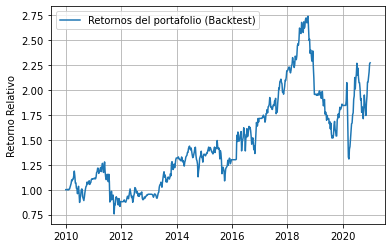

In [57]:
plt.plot(test)
plt.grid()
plt.legend(['Retornos del portafolio (Backtest)'])
plt.ylabel('Retorno Relativo');

In [21]:
y_small = getYPerf(y_) # y is cut down version of y_ with stock returns only

# Create a boolean mask for the backtest year we are interested in
date = pd.to_datetime('2015-01-01 07:00:00')
mask = y_["Date"].between( pd.to_datetime(date) - pd.Timedelta(days=60), pd.to_datetime(date) + pd.Timedelta(days=60) )
#y_[mask] # Checking the mask works
#x[mask]

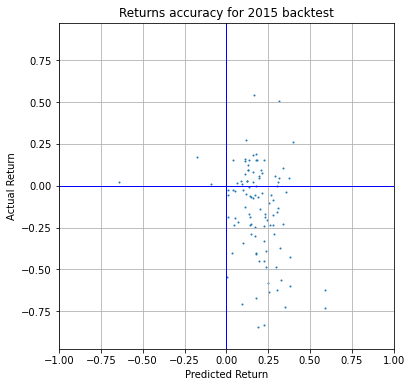

In [22]:
# Load the model pipeline
# can be pl_linear.p, pl_KNeighbors.p, pl_rfregressor.p, pl_decTree.p, pl_svm.p ...
ml_model_pipeline = pickle.load(open("pl_linear.p", "rb" ))
y_pred = ml_model_pipeline.predict(X_test[mask]) # Get stock performance predictions
y_pred = pd.DataFrame(y_pred) # Turn into DataFrame

plt.figure(figsize=(6,6))
# Now output graph.
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
plt.scatter(y_pred[0], y_small[mask]["Perf"], s=1)
# Formatting
plt.grid()
plt.axis('equal')
plt.title('Returns accuracy for {} backtest'.format(date.year))
plt.xlabel('Predicted Return')
plt.ylabel('Actual Return')
plt.axvline(c='blue', lw=1)
plt.axhline(c='blue', lw=1)
plt.savefig('result.png')
plt.axis([-1,1,-1,1]);

In [23]:
# Top stocks picked, and predicted performance.
bl = (y_pred[0] > y_pred.nlargest(8,0).tail(1)[0].values[0])

print("\nTop predicted perf. stocks picked are:")
print(y_small[mask].reset_index(drop=True)[bl]["Ticker"])
print("\nTop stocks predicted performance is:")
print(y_pred[bl])


print("\nActual performance was: ")
print(y_small[mask].reset_index(drop=True)[bl])

# Calc Altman Z score:
Z = 3.25 \
+ 6.51 * X_test[mask].reset_index(drop=True)[bl]['(CA-CL)/TA']\
+ 3.26 * X_test[mask].reset_index(drop=True)[bl]['RE/TA']\
+ 6.72 * X_test[mask].reset_index(drop=True)[bl]['EBIT/TA']\
+ 1.05 * X_test[mask].reset_index(drop=True)[bl]['Book Equity/TL']
print('\nZ scores:\n',Z)


Top predicted perf. stocks picked are:
2     LLNW
5      CNC
22    VRSN
26     NAV
36    TPCO
69    TIME
76    DXCM
Name: Ticker, dtype: object

Top stocks predicted performance is:
           0
2   0.377280
5   0.355538
22  0.396248
26  0.591472
36  0.587828
69  0.377467
76  0.374179

Actual performance was: 
   Ticker      Perf
2    LLNW -0.602007
5     CNC -0.036418
22   VRSN  0.263209
26    NAV -0.732625
36   TPCO -0.624694
69   TIME -0.423977
76   DXCM  0.048119

Z scores:
 2      9.598341
5      4.952514
22   -27.489576
26     1.229350
36     4.422957
69    -0.690919
76     0.705275
dtype: float64


In [24]:
# bool list of 7 greatest performance stocks of y_pred 
bl = (y_pred[0] > y_pred.nlargest(8,0).tail(1)[0].values[0])

# See what the performance is of the selection
print("Backtest return is:")
print(y_small[mask]["Perf"].reset_index(drop=True)[bl].values.mean())

Backtest return is:
-0.3011989505356095


In [25]:
d = getYRawData()

Reading historical time series stock data, matrix size is:  (8125701, 11)


In [26]:
y_[mask]

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
13349,PSX,77.52,2015-02-20,3.539637e+08,PSX,81.05,2016-02-22,2.656705e+08
16772,TXT,45.30,2015-02-25,8.659104e+07,TXT,34.03,2016-02-25,5.221713e+07
9765,LLNW,2.99,2015-02-17,1.595634e+06,LLNW,1.19,2016-02-17,3.009522e+05
13805,RFP,18.28,2015-03-02,2.500375e+06,RFP,5.03,2016-03-01,3.010807e+06
6624,FMC,55.18,2015-02-27,4.291315e+07,FMC,32.95,2016-02-29,5.109049e+07
...,...,...,...,...,...,...,...,...
927,AMAT,23.80,2014-12-17,4.148469e+08,AMAT,18.71,2015-12-17,2.521256e+08
10216,MAR,83.78,2015-02-19,3.290401e+08,MAR,64.50,2016-02-19,2.319949e+08
12139,O,50.17,2015-02-18,1.020506e+08,O,57.95,2016-02-18,1.319016e+08
14596,SGEN,36.76,2015-02-27,4.478291e+07,SGEN,30.95,2016-02-29,3.575022e+07


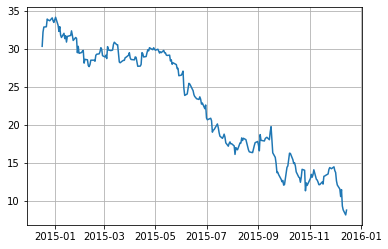

In [27]:
rows = getStockPriceData("NAV", y_, mask, d, rows=pd.DataFrame())
plt.plot(rows["Date"], rows["Close"]) # Adj. Close
plt.grid(True)

In [28]:
rows

,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
1930179,NAV,203261,2014-12-17,29.12,29.12,30.91,30.34,30.34,NaN,5252531,81400000.0
1930180,NAV,203261,2014-12-18,31.60,31.56,32.50,32.21,32.21,NaN,1624601,81400000.0
1930181,NAV,203261,2014-12-19,32.32,32.05,32.93,32.87,32.87,NaN,1168382,81400000.0
1930182,NAV,203261,2014-12-22,32.88,32.52,34.22,32.91,32.91,NaN,1067886,81400000.0
1930183,NAV,203261,2014-12-23,33.21,32.91,33.99,33.92,33.92,NaN,1001106,81400000.0
...,...,...,...,...,...,...,...,...,...,...,...
1930425,NAV,203261,2015-12-09,10.56,10.52,11.54,11.51,11.51,NaN,1488789,81500000.0
1930426,NAV,203261,2015-12-10,11.05,9.32,11.06,9.37,9.37,NaN,5866826,81500000.0
1930427,NAV,203261,2015-12-11,9.21,8.31,9.29,8.85,8.85,NaN,4115190,81500000.0
1930428,NAV,203261,2015-12-14,8.78,7.90,8.89,8.19,8.19,NaN,2701984,81500000.0


See how individual stocks perform

In [29]:
# Make X ticks standard, and grab stock prices as close to those points as possible for each stock (To track performance)
date_range = pd.date_range(start=date, periods=52, freq='W')#DatetimeIndex

# 7 greatest performance stocks of y_pred 
ticker_list = y_[mask].reset_index(drop=True)[bl]["Ticker"].values
stockRet = getStockTimeSeries(date_range, y_, ticker_list , mask, daily_stock_prices)

In [30]:
stockRetRel = getPortfolioRelativeTimeSeries(stockRet)

In [31]:
stockRetRel.head()

,LLNW,CNC,VRSN,NAV,TPCO,TIME,DXCM,Portfolio
2015-01-04 07:00:00,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000
2015-01-11 07:00:00,1.0,1.0,1.0,0.968278,1.0,1.0,1.0,0.995468
2015-01-18 07:00:00,1.0,1.0,1.0,0.959819,1.0,1.0,1.0,0.994260
2015-01-25 07:00:00,1.0,1.0,1.0,0.951662,1.0,1.0,1.0,0.993095
2015-02-01 07:00:00,1.0,1.0,1.0,0.891843,1.0,1.0,1.0,0.984549


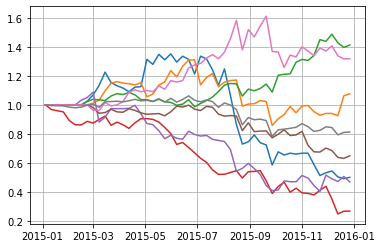

In [32]:
plt.plot(stockRetRel);
plt.grid()

Now plot backtest with S&P500

volatility of AI investor was:  0.3989216667848881
volatility of S&P 500 was:  0.42155767515343046


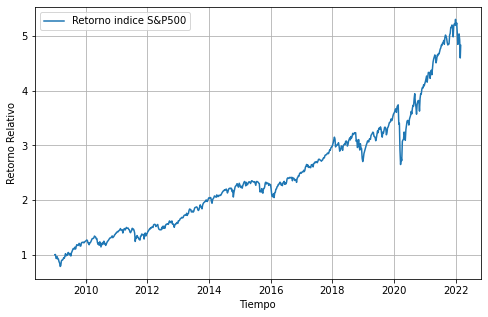

In [58]:
# GSPC.csv taken directly from Yahoo.com is the S&P500.
spy=pd.read_csv("GSPC.csv", index_col='Date', parse_dates=True)
spy['Relative'] = spy["Open"]/spy["Open"][0]

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(spy['Relative'])
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Retorno Relativo')
plt.legend(['Retorno indice S&P500', 'Linear Regressor Stock Picker'])
#plt.savefig('spy.png')
print('volatility of AI investor was: ', test['Indexed Performance'].diff().std()*np.sqrt(52))
print('volatility of S&P 500 was: ', spy["Relative"].diff().std()*np.sqrt(52))

In [129]:
spy['Relative']

Date
2009-01-01    1.000000
2009-01-08    1.003034
2009-01-15    0.932447
2009-01-22    0.929955
2009-01-29    0.962237
                ...   
2022-02-03    5.022658
2022-02-10    5.042404
2022-02-17    4.934783
2022-02-24    4.602233
2022-03-01    4.831881
Name: Relative, Length: 688, dtype: float64

In [142]:
test["Indexed Performance"]

2010-01-03    1.000000
2010-01-10    0.998573
2010-01-17    1.002454
2010-01-24    1.000342
2010-01-31    1.002854
                ...   
2020-11-29    4.781333
2020-12-06    4.823144
2020-12-13    5.023527
2020-12-20    5.380385
2020-12-27    5.535641
Name: Indexed Performance, Length: 572, dtype: float64

In [91]:
spy['Relative']

Date
2009-01-01    1.000000
2009-01-08    1.003034
2009-01-15    0.932447
2009-01-22    0.929955
2009-01-29    0.962237
                ...   
2022-02-03    5.022658
2022-02-10    5.042404
2022-02-17    4.934783
2022-02-24    4.602233
2022-03-01    4.831881
Name: Relative, Length: 688, dtype: float64

In [92]:
spy

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Relative
Date,,,,,,,,
2009-01-01,0,902.989990,943.849976,899.349976,906.650024,906.650024,19559740000,1.000000
2009-01-08,1,905.729980,911.929993,836.929993,842.619995,842.619995,25408440000,1.003034
2009-01-15,2,841.989990,858.130005,804.299988,840.239990,840.239990,27436450000,0.932447
2009-01-22,3,839.739990,877.859985,806.070007,874.090027,874.090027,29268370000,0.929955
2009-01-29,4,868.890015,868.890015,812.869995,832.229980,832.229980,28397670000,0.962237
...,...,...,...,...,...,...,...,...
2022-02-03,683,4535.410156,4590.029785,4451.500000,4587.180176,4587.180176,17734270000,5.022658
2022-02-10,684,4553.240234,4588.919922,4364.839844,4475.009766,4475.009766,18963580000,5.042404
2022-02-17,685,4456.060059,4456.060059,4221.509766,4225.500000,4225.500000,15289970000,4.934783


In [59]:
start_date = "2010-01-03"
end_date = "2020-12-27"

after_start_date = spy.index >= start_date
before_end_date = spy.index <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = spy.loc[between_two_dates]

In [60]:
filtered_dates.drop(['Relative'], axis=1)

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-07,53,1136.270020,1149.739990,1131.319946,1145.680054,1145.680054,22802570000
2010-01-14,54,1145.680054,1150.449951,1129.250000,1138.040039,1138.040039,18209320000
2010-01-21,55,1138.680054,1141.579956,1083.109985,1097.500000,1097.500000,27615360000
2010-01-28,56,1096.930054,1104.729980,1071.589966,1097.280029,1097.280029,23977850000
2010-02-04,57,1097.250000,1097.250000,1044.500000,1068.130005,1068.130005,25754120000
...,...,...,...,...,...,...,...
2020-11-26,621,3638.550049,3678.449951,3594.389893,3669.010010,3669.010010,19503130000
2020-12-03,622,3668.280029,3712.389893,3657.169922,3672.820068,3672.820068,24726300000
2020-12-10,623,3659.129883,3711.270020,3633.399902,3701.169922,3701.169922,21997540000


In [61]:
filtered_dates['Relative'] = filtered_dates["Open"]/filtered_dates["Open"][0]

C:\Users\Usuario\AppData\Local\Temp/ipykernel_58888/1391807714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dates['Relative'] = filtered_dates["Open"]/filtered_dates["Open"][0]


In [62]:
filtered_dates

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Relative
Date,,,,,,,,
2010-01-07,53,1136.270020,1149.739990,1131.319946,1145.680054,1145.680054,22802570000,1.000000
2010-01-14,54,1145.680054,1150.449951,1129.250000,1138.040039,1138.040039,18209320000,1.008282
2010-01-21,55,1138.680054,1141.579956,1083.109985,1097.500000,1097.500000,27615360000,1.002121
2010-01-28,56,1096.930054,1104.729980,1071.589966,1097.280029,1097.280029,23977850000,0.965378
2010-02-04,57,1097.250000,1097.250000,1044.500000,1068.130005,1068.130005,25754120000,0.965660
...,...,...,...,...,...,...,...,...
2020-11-26,621,3638.550049,3678.449951,3594.389893,3669.010010,3669.010010,19503130000,3.202188
2020-12-03,622,3668.280029,3712.389893,3657.169922,3672.820068,3672.820068,24726300000,3.228352
2020-12-10,623,3659.129883,3711.270020,3633.399902,3701.169922,3701.169922,21997540000,3.220300


volatilidad modelo:  0.3989216667848881
volatilidad S&P 500:  0.3131362579812779
Performance modelo:   127.41051767078697 %
Performance S&P 500:   225.10142518765042 %


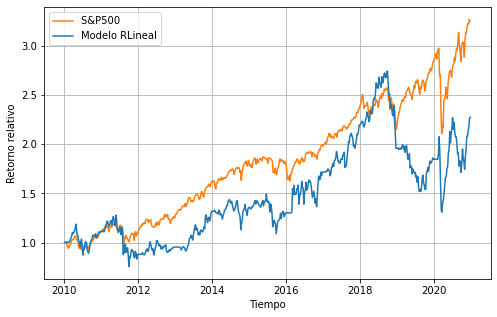

In [54]:
plt.figure(figsize=(8,5))
plt.plot(filtered_dates['Relative'], color='C1')
plt.plot(test["Indexed Performance"], color='C0')
plt.legend(['S&P500 ', 'Modelo RLineal'])
plt.xlabel('Tiempo')
plt.ylabel('Retorno relativo')
plt.grid()
print('volatilidad modelo: ', test['Indexed Performance'].diff().std()*np.sqrt(52))
print('volatilidad S&P 500: ', filtered_dates['Relative'].diff().std()*np.sqrt(52))
print('Performance modelo:  ', 100 * (test["Indexed Performance"][-1]-1), '%')
print('Performance S&P 500:  ', 100 * (filtered_dates["Relative"][-1]-1), '%')